# 1. Import important packages

We now import the important libraries for loading, manipulating the data and bulding the machine learning pridictive models. We import the pandas for data loading and manipulation, matplotlib.pyplot to graphical presentation of data, train_test_split for dividing the data into training and testing dataset, logistic regression for building the logistic regression model, metric, random forest for building the random forest classifier model, svm for building the support vector machine model, f1_score for performance evaluation and pickle for saving the model in the pickle file.

In [16]:
#import the pandas package to perform data loading, manipulations and analysis.
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import f1_score
import pickle

In [17]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\MAHHEMBE\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


# 2. Data Loading

### 2.1 overview of the entire loaded dataset

Since the data was collected from MATLAB and saved to multiple excel files, We now load the data collected from the simulation which was stored in the excel file, we load this data in the pandas dataframe to manipulate it and perform data analysis processes. the data is loaded in the df variable.

In [18]:
#data loading
df=pd.read_excel('Research_collected_data_for_building_the_model.xlsx',index_col=False)

We now view the data loaded in the df data frame variable, this is the data that was collected from the MATLAB for multiple transmissions (9696 transmissions) between the sender and the receiver using the HARQ protocol, as shown by the output of the code below.

In [19]:
df

,'num_of_transmission','Initial_transmission','retransmission','number_of_retransmission','transport_block_size','bits_to_transmit','coded_data','modulated_data','SNR','channel_data','demodulated_data','decoded_data','block_crc','Acknoledgement','ACK/NACK'
0,1,1,0,0,32,'[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 ...,'''[1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 ...,'''[0.9487+0.3162i -0.9487+0.3162i -0.3162-0.9...,-11.153851,'''[-1.1186+0.0784i -8.4676+4.2393i 3.357-2.42...,'''[-1.11856999500713 -0.0783578035969243 0.48...,'[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 ...,False,1,'ACK'
1,2,1,0,0,32,'[1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 ...,'''[0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 ...,'''[-0.9487+0.3162i -0.3162-0.3162i 0.3162+0.3...,-2.137236,'''[-0.5844+0.1459i -1.3557-1.726i 0.1223-0.28...,'''[-0.584367570459123 -0.145923308212743 -0.0...,'[1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 ...,False,1,'ACK'
2,3,1,0,0,32,'[1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 ...,'''[0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 ...,'''[-0.9487+0.3162i -0.3162-0.3162i 0.9487-0.9...,-21.205587,'''[-0.9688+2.1498i -3.491-8.8376i -8.5119+3.8...,'''[-0.968800179363594 -2.1498137950507 0.3363...,'[1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 ...,True,0,'NACK'
3,3,0,1,1,32,'[1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 ...,'''[1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 ...,'''[0.9487+0.9487i 0.3162+0.3162i -0.9487-0.31...,-21.205587,'''[-11.3262+9.5143i 2.7073-13.3458i 7.908-5.5...,'''[-11.3261651698457 -9.51426725704367 10.693...,'[1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 ...,True,0,'NACK'
4,3,0,1,2,32,'[1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 ...,'''[1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 ...,'''[0.9487-0.9487i 0.9487+0.3162i -0.3162-0.94...,-21.205587,'''[-5.5593-3.0496i 10.1895+8.0987i -9.0316-3....,'''[-5.55926575924465 3.049574135715 4.9268102...,'[1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 ...,True,0,'NACK'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9690,5998,1,0,0,256,'''[1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 ...,'''[0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 ...,'''[-0.3162-0.3162i -0.9487-0.3162i 0.9487-0.3...,15.126483,'''[-0.067-0.4535i -1.0772-0.3193i 0.9451-0.18...,'''[-0.0669967237952275 0.453476472106764 -0.5...,'''[1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 ...,False,1,'ACK'
9691,5999,1,0,0,256,'''[0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 ...,'''[0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 ...,'''[-0.9487+0.3162i -0.9487-0.9487i -0.3162+0....,9.787344,'''[-0.869+0.7203i -1.0129-1.4799i -0.7796+0.4...,'''[-0.869040296624749 -0.720284280133994 0.23...,'''[0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 ...,False,1,'ACK'
9692,6000,1,0,0,256,'''[0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 ...,'''[1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 ...,'''[0.3162-0.3162i -0.3162-0.9487i 0.3162+0.31...,-12.478976,'''[0.0828-0.7845i -5.6671+2.8703i -4.0718+1.1...,'''[0.0827927999277413 0.784486103770216 -0.54...,'''[0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 ...,True,0,'NACK'
9693,6000,0,1,1,256,'''[0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 ...,'''[1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 ...,'''[0.3162-0.9487i 0.9487+0.9487i 0.9487-0.316...,-12.478976,'''[-2.4219-0.7954i 1.386+0.8291i -1.3689-6.13...,'''[-2.42189835320053 0.795423786045274 1.7894...,'''[0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 ...,True,0,'NACK'


# 3.  Exploratory Data Analysis (EDA)

### 3.1 Description of the columns or features of the dataset

To understand our data we perform the exploratory data analysis (EDA), we firstly check the columns of the data collected during the simulations as shown in the output of the code below.

In [20]:
df.dtypes

'num_of_transmission'           int64
'Initial_transmission'          int64
'retransmission'                int64
'number_of_retransmission'      int64
'transport_block_size'          int64
'bits_to_transmit'             object
'coded_data'                   object
'modulated_data'               object
'SNR'                         float64
'channel_data'                 object
'demodulated_data'             object
'decoded_data'                 object
'block_crc'                      bool
'Acknoledgement'                int64
'ACK/NACK'                     object
dtype: object

From the code above, we can see that our data have 15 columns:

1) num_of_transmission: which indicates the number of new transmission without including or counting the retransmission.

2) Initial_transmission: indicates whether the current transmission is the initial transmission (presented by 1) or the retransmission (presented by 0) 

3) retransmission: indicates whether the current transmission is the retransmission (presented by 1) of the previously nagatively-acknowledged transmission 

4) number_of_retransmission: presents the number of retransmission for a failed transmission.

5) transport_block_size: is the number of bits or the size of the block transmitted for each transmission.

6) bits_to_transmit: is the actual data to be transmitted, is in the form of binary numbers

7) coded_data: is the encoded data generated by the turbo decoder after passing the actual data to the turbo decoder,it has the CRC added to it for error corrections 
               and detection, it is in the form of binary numbers.

8) modulated_data: is the data generated by the modulator after passing the encoded data to the 16QAM modulator, the data is the form of complex numbers.

9) SNR: is the noise added to the channel during the transmission of data from sender to the channel.

10) channel_data: is the data transmitted to the receiver and generated by the channel after passing the modulated data to the channel. This data is in the form of
                  complex numbers with some noise added to it.

11) demodulated_data: is the demodulated data, which is generated by the 16QAM demodulator on the receiver. this data will is passed to the decoder after being
                      demodulated

12) decoded_data: Is the data generated by the turbo decoder, the sender use this data and the CRC in this data to check if any error occured during the transmission

13) block_crc: is the CRC value, used to determine if an error have occured during the transmission of data. presented by true if error have occured and false if not.

14) Acknoledgement: presents  whether the transmission was successful or not, 1 present successful transmission and 0 presents unsuccessful transmission and re
                    questing  the retransmission of packets

15) ACK/NACK: presents the feedback sent to the transmitter for each transmission. NACK presents unssucessful transmission requesting the retransmission, ACK presents
              successful transmission and the TIMEOUT presents unssuccessful transmission but does not require the retransmission because the maximum number of retransmission is reached.

### 3.2 Number of Transmission made during the simulation

We now look at the information about our data.

From the output of the code below, we can see that there are 9695 total transmission made during the simulations, these also includes the number of the retransmitted data

In [21]:
total_number_of_transmission=df.count()[0];
print(total_number_of_transmission);

9695


The output of the code below display the total number of failed initial transmission which is 4390, it does not include the retransission. 

In [22]:
total_failed_initial_transmission=df.loc[(df["'Acknoledgement'"] ==0) & (df["'Initial_transmission'"] == 1)]
total_failed_initial_transmission["'num_of_transmission'"].count()

1610

The output of the code below shows the total of transmissions that were successfully transmitted withot any retransmission.

In [23]:
total_successful_initial_transmission=df.loc[(df["'Acknoledgement'"] ==1) & (df["'Initial_transmission'"] == 1)]
total_successful_initial_transmission["'num_of_transmission'"].count()

4390

The output of the code below shows the total number of failed transmission (including the number of failed retransmissions)

In [24]:
total_failed_transmission=df.loc[(df["'Acknoledgement'"] ==0)]
total_failed_transmission["'Acknoledgement'"].count()

4381

The output of the code below shows the total number of transmission made during the simulation (excluding the number of retransmission)

In [25]:
total_transmission=6000
print(total_transmission);

6000


The output of the code below shows the total number of successful retransmissions which is 924.

In [26]:
total_successful_retransmission=df.loc[(df["'Acknoledgement'"] ==1) & (df["'retransmission'"] == 1)]
print(total_successful_retransmission["'retransmission'"].count())

924


we now look at the relationships between various features that can help us to build the models. we have two tables acquired during the simulation to identify the relationship betwee the SNR, the packet size and the acknowledgment

## 3.3 SNR analysis

To ivestigate the relationship between the SNR and the feedback, we conducted the another simulations. In this simulations, we kept all the variables constant during the transmission but we used different SNR values in our channel: starting from -20 to 20 incremented by 2. then we saved the data for that simuation in the file named 'SNR_data.xlsx' on MATLAB. the code below loads the data from the 'SNR_data.xlsx' to the 'df_SNR' variable in order to investigate the relationship between the SNR and the feedback. the output of the code below shows the loaded data.

In [27]:
df_SNR=pd.read_excel('SNR_data.xlsx')
df_SNR

,'num_of_transmission','Initial_transmission','retransmission','number_of_retransmission','transport_block_size','bits_to_transmit','coded_data','modulated_data','SNR','channel_data','demodulated_data','decoded_data','block_crc','Acknoledgement','ACK/NACK'
0,1,1,0,0,512,'''[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 ...,'''[1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 ...,'''[0.3162-0.3162i 0.3162+0.9487i 0.9487-0.948...,-20,'''[1.1149-6.6946i 3.4272-4.3954i 1.6675+5.241...,'''[1.11486751906465 6.69459785575076 0.482411...,'''[1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 ...,True,0,'NACK'
1,1,0,1,1,512,'''[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 ...,'''[1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 ...,'''[0.3162+0.9487i 0.3162-0.9487i -0.9487+0.94...,-20,'''[-3.855+1.9337i 3.6841+1.1563i -0.5684-2.78...,'''[-3.85496894358437 -1.93369838904279 3.2225...,'''[1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 ...,True,0,'NACK'
2,1,0,1,2,512,'''[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 ...,'''[0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 ...,'''[-0.9487+0.3162i -0.9487-0.3162i -0.3162+0....,-20,'''[-7.2795-0.8314i 0.6096-10.9495i -1.6981+2....,'''[-7.27948625206373 0.831438423828597 6.6470...,'''[1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 ...,True,0,'NACK'
3,1,0,1,3,512,'''[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 ...,'''[1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 ...,'''[0.3162+0.9487i -0.3162-0.9487i -0.3162-0.3...,-20,'''[-2.3658+2.2871i 10.132-11.6625i -6.3901+11...,'''[-2.36576772646861 -2.28712143475727 1.7333...,'''[1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 ...,True,0,'TIMEOUT'
4,2,1,0,0,512,'''[1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 ...,'''[1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 ...,'''[0.3162+0.3162i -0.9487+0.9487i 0.3162-0.94...,-18,'''[-1.1907-1.9065i 3.3328-5.9331i -1.0545+6.6...,'''[-1.19073875311504 1.9065226437555 0.558283...,'''[1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 ...,True,0,'NACK'
5,2,0,1,1,512,'''[1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 ...,'''[0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ...,'''[-0.9487+0.3162i -0.3162-0.9487i 0.9487+0.9...,-18,'''[-4.41-2.862i -2.8603-1.0923i -2.8608+4.027...,'''[-4.41002741295239 2.86195502057366 3.77757...,'''[0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 ...,True,0,'NACK'
6,2,0,1,2,512,'''[1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 ...,'''[0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 ...,'''[-0.9487-0.3162i 0.3162-0.9487i -0.3162+0.9...,-18,'''[-5.1575-6.803i 3.1156-1.4127i 5.6356+4.031...,'''[-5.15748382701728 6.80299656522607 4.52502...,'''[1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 ...,True,0,'NACK'
7,2,0,1,3,512,'''[1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 ...,'''[1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 ...,'''[0.3162-0.9487i 0.3162+0.9487i 0.9487-0.316...,-18,'''[0.262+0.3233i 4.2601+9.0911i 12.9187+7.028...,'''[0.26195333499197 -0.323322386691752 -0.370...,'''[1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 ...,True,0,'TIMEOUT'
8,3,1,0,0,512,'''[0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 ...,'''[1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 ...,'''[0.9487+0.9487i 0.3162+0.9487i 0.3162-0.948...,-16,'''[-1.9924+2.6323i 2.6832+1.7153i 3.4335+4.63...,'''[-1.99238308290071 -2.63228214897039 1.3599...,'''[1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 ...,True,0,'NACK'
9,3,0,1,1,512,'''[0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 ...,'''[1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 ...,'''[0.3162+0.9487i -0.3162+0.9487i -0.3162-0.9...,-16,'''[3.2794-0.1716i -0.185+1.4712i 3.3679-2.207...,'''[3.27942127916372 0.17164481325409 2.646965...,'''[0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 ...,True,0,'NACK'


The code below counts the number failed and passed transmission for different SNR.

In [28]:
SNR_failed=df_SNR.groupby(["'SNR'","'Acknoledgement'"],as_index=False)["'ACK/NACK'"].count()
#SNR_failed=pd.DataFrame(SNR_failed);
SNR_failed=pd.DataFrame(SNR_failed)
SNR_failed.rename(columns={"'SNR'":'SNR',"'Acknoledgement'":'Acknoledgement',"'ACK/NACK'":'ACK'},inplace=True)
SNR_failed

,SNR,Acknoledgement,ACK
0,-20,0,4
1,-18,0,4
2,-16,0,4
3,-14,0,4
4,-12,0,4
5,-10,0,2
6,-10,1,1
7,-8,0,1
8,-8,1,1
9,-6,0,1


The code below shows the only the number of failed transmission for different SNR and we can see that the number of failed transmission is very high at lower SNR. this is caused by the fact that at lower SNR we have more noise in the channel than the signal strength.

In [29]:
SNRR=SNR_failed.loc[SNR_failed["Acknoledgement"]==0]
SNRR


,SNR,Acknoledgement,ACK
0,-20,0,4
1,-18,0,4
2,-16,0,4
3,-14,0,4
4,-12,0,4
5,-10,0,2
7,-8,0,1
9,-6,0,1


From the graph below, we can see that as the signal strength (SNR) increases, the number of failed transmission decreases. which means that the increasing the signal strength will result in successful transmission. This implies that the SNR is one of the factors affecting the feedback, therefore for this reason, we will use the SNR to build our model.

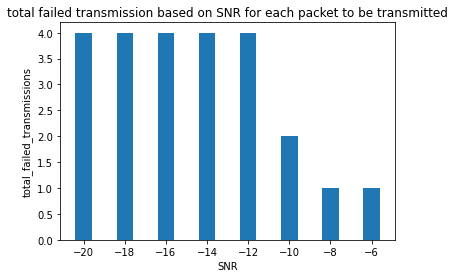

<Figure size 216x216 with 0 Axes>

In [30]:
plt.bar(SNRR['SNR'],SNRR['ACK'])
plt.xlabel('SNR')
plt.ylabel('total_failed_transmissions')
plt.title('total failed transmission based on SNR for each packet to be transmitted')
plt.figure(figsize=(3, 3))
plt.show()


## 3.4 packet size analysis

To identify the relationship between the packet size and the feedback, we conducted the third simulation. in this simulation we kept all the variable constant including the SNR, then we transmitted packets of different sizes, we then saved the data collected from MATLAB during the simulation to the excel file named: 'packet_size_data_for_simulation.xlsx'. we now load this data from that file to the pandas variable to analyze the data and identify the relationship as show in the code below.

In [31]:
packet_df=pd.read_excel("packet_size_data_for_simulation.xlsx");
packet_df

,'num_of_transmission','Initial_transmission','retransmission','number_of_retransmission','transport_block_size','bits_to_transmit','coded_data','modulated_data','SNR','channel_data','demodulated_data','decoded_data','block_crc','Acknoledgement','ACK/NACK'
0,1,1,0,0,32,'[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 ...,'''[1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 ...,'''[0.9487+0.3162i -0.9487+0.3162i -0.3162-0.9...,-9,'''[-1.1815+2.3385i -2.5619+0.1306i -6.1839+2....,'''[-1.18146616111501 -2.33848033714211 0.5490...,'[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 ...,False,1,'ACK'
1,2,1,0,0,64,'''[1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 ...,'''[0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 ...,'''[-0.9487+0.3162i 0.3162+0.3162i 0.9487-0.31...,-9,'''[-0.3209+0.5397i -3.4187-0.7816i 0.6367-1.4...,'''[-0.320934590127423 -0.5397250717625 -0.311...,'''[1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 ...,False,1,'ACK'
2,3,1,0,0,128,'''[1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 ...,'''[0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 ...,'''[-0.9487+0.3162i 0.3162+0.3162i 0.3162-0.31...,-9,'''[-0.1331+4.13i -0.6172-3.6598i 1.9686-3.629...,'''[-0.133146714059411 -4.12996137586337 -0.49...,'''[1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 ...,False,1,'ACK'
3,4,1,0,0,256,'''[1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 ...,'''[1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 ...,'''[0.9487+0.9487i 0.3162+0.3162i -0.3162+0.94...,-9,'''[1.288-0.9097i -1.8453+3.9351i -0.2124-0.29...,'''[1.2880147322365 0.909689937575074 0.655559...,'''[1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 ...,False,1,'ACK'
4,5,1,0,0,512,'''[0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 ...,'''[1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 ...,'''[0.9487-0.9487i 0.9487-0.9487i 0.9487+0.948...,-9,'''[0.8841-4.9089i -0.4252-1.5022i 0.1139+2.84...,'''[0.884084652021694 4.90889057393489 0.25162...,'''[0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 ...,True,0,'NACK'
5,5,0,1,1,512,'''[0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 ...,'''[0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 ...,'''[-0.9487+0.3162i -0.9487+0.9487i 0.3162+0.3...,-9,'''[-0.9047+3.569i 0.0776+0.9695i 2.9933-1.586...,'''[-0.904697045859391 -3.56903531543335 0.272...,'''[0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 ...,False,1,'ACK'
6,6,1,0,0,1024,'''[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,'''[0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 ...,'''[-0.9487+0.3162i 0.3162-0.9487i 0.3162+0.94...,-9,'''[2.9388+1.7062i 0.3939-7.0136i -1.4389-1.39...,'''[2.93884462056884 -1.70622947708669 2.30638...,'''[1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 ...,True,0,'NACK'
7,6,0,1,1,1024,'''[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,'''[0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 ...,'''[-0.9487+0.3162i 0.9487-0.9487i -0.3162-0.9...,-9,'''[-1.8219-1.6764i -1.803+0.3947i -1.2355-0.0...,'''[-1.8219465235569 1.67639316401387 1.189490...,'''[1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 ...,True,0,'NACK'
8,6,0,1,2,1024,'''[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,'''[1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 ...,'''[0.3162-0.9487i 0.3162-0.3162i -0.9487-0.31...,-9,'''[4.0525+0.4278i -1.0783-2.8591i -1.2674-0.4...,'''[4.05245435168119 -0.427808482829987 3.4199...,'''[0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,True,0,'NACK'
9,6,0,1,3,1024,'''[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,'''[1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 ...,'''[0.9487+0.3162i -0.3162+0.3162i -0.9487-0.3...,-9,'''[-1.0725-0.6455i 0.4338+2.5165i -0.781-1.95...,'''[-1.07252728136286 0.645534404983233 0.4400...,'''[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,False,1,'ACK'


The code below counts the number of failed transmissions for different packet sizes used during the simulations.

In [32]:
packet_df1=packet_df.groupby(["'transport_block_size'","'Acknoledgement'"],as_index=False)["'ACK/NACK'"].count()
#SNR_failed=pd.DataFrame(SNR_failed);
#SNR_failed=pd.DataFrame(SNR_failed)
#SNR_failed.rename(columns={"'SNR'":'SNR',"'Acknoledgement'":'Acknoledgement',"'ACK/NACK'":'ACK'},inplace=True)
#SNR_failed
packet_df2=packet_df1[packet_df["'Acknoledgement'"]==0]




packet_df2=packet_df2.drop(packet_df2[packet_df2["'Acknoledgement'"] ==1].index)

#packet_df2["'Acknoledgement'"]

packet_df2


C:\Users\MAHHEMBE\AppData\Local\Temp/ipykernel_11848/1680607405.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  packet_df2=packet_df1[packet_df["'Acknoledgement'"]==0]


,'transport_block_size','Acknoledgement','ACK/NACK'
4,512,0,1
6,1024,0,3
8,2048,0,4


The output of the code below presents total number of failed transmissions for different packet sizes

Text(0.5, 1.0, 'total failed transmission for different packet size')

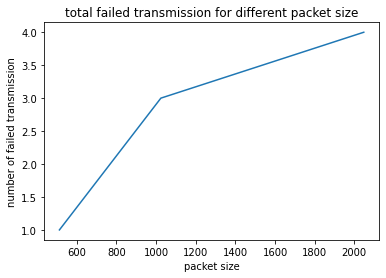

In [33]:
plt.plot(packet_df2["'transport_block_size'"],packet_df2["'ACK/NACK'"])
plt.xlabel("packet size");
plt.ylabel("number of failed transmission")
plt.title("total failed transmission for different packet size")

from the picture above, we can see that the packet the number of failed transmission is lower when the packet size is smaller, so this shows that the packet size do affect the the feedback generated at the receiver for each transmission. Conversely, the number of failed transmission increases as the packet size increase. This opens a research gap for proposing a scheme that can find the optimal packet size based on the noise in the channel since we saw that the noise is another factor that affects the feedback generated at the receiver. Since we showed that the SNR and the packet size affect the feedback, we have to make sure that they are included when building the model.

# 4. Feature Engineering

### 4.1 Data Cleaning

This section prepare data and ensure that the data is ready for building the model. firtly we check for the number of nulls in each column   

we firstly check the number of null in our dataset. From the output of the code below, we can see that our data does not have nulls, therefore, there is no data cleaning required for our project

In [34]:
df.isnull().sum()

'num_of_transmission'         0
'Initial_transmission'        0
'retransmission'              0
'number_of_retransmission'    0
'transport_block_size'        0
'bits_to_transmit'            0
'coded_data'                  0
'modulated_data'              0
'SNR'                         0
'channel_data'                0
'demodulated_data'            0
'decoded_data'                0
'block_crc'                   0
'Acknoledgement'              0
'ACK/NACK'                    0
dtype: int64

### 4.2 Feature selection

Since our data is clean, we now select the feature needed for building the model. since we have showed that the SNR and the packet size affect the feedback, we select them and the retransmission varible so that our model can know whether the current transmission is the retransmission or the new transmission. We also select the 'number_of_retransmission'. we then store all these features in the x variable and we create y-variable to store the response variable (the 'Acknoledgement' ) because the model need to predict the 'Acknoledgement'.

In [35]:
x=df[["'retransmission'","'number_of_retransmission'","'transport_block_size'","'SNR'"]];
y=df[["'Acknoledgement'"]]

the code below drop the index column because it is not needed when building the model.

In [36]:
y.reset_index(drop=True, inplace=True)

to make the response variable to be more understandable we convert it to numpy array.

In [37]:
y=y.to_numpy()

our response variable is in the form of array of arrays, so we need to make it to be in the form of array of integers for faster predictions.

In [38]:
y

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [39]:
l=[]
for i in y :
    l.append(i[0]);

In [40]:
y=l

### 4.3 data splitting

Since our data is clean and is in the correct format, we now split our dataset into training and testing dataset. Eighty percent (80%) of the data is used for training the model and twenty (20%) of the data is used for testing, this is achieved by the code below.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=1)

Now our data is clean and is divided into training and testting dataset, which means that we can now build the model.

# 5. Model Building

### 5.1 Logistic Regression

In the code below we create the logistic regression model with 50 random states.

In [42]:
#model creation
lr= LogisticRegression(random_state = 50)

We then train our model using the training dataset in the code below. so we consider our dataset as the data that is already been seen by the model.

In [43]:
# model training
lr.fit(X_train,y_train)

LogisticRegression(random_state=50)

After training our logistic regression model, we then test it by making predictions on unseen data (testing data) using the model in the code below. 

In [44]:
# make predictions for the testing dataset
y_pred=lr.predict(X_test)

We then calculate the F1_score and the RMSE of the model using the predicted and the actual values. this f1_score measure the prediction accuracy of the model 

In [45]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.18309132760580415

In [59]:
f1_lr=f1_score(y_test, y_pred, average='macro')
f1_lr

0.9663069011304638

### 5.2 Random forest classifier

We now build the second model which is the random forest, the code below creates the random forest model.

In [47]:
rf=RandomForestClassifier(n_estimators=100,max_depth=10, random_state=100)

We now train the created model using the training dataset, this is achieved by the code below.

In [48]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=100)

So we now test our model using the testing dataset, the model make predictions for the unseen data (testing), this is achieved by the code below.

In [49]:
y_pred_rf=rf.predict(X_test)

we now compute the F1_score and the RMSE using the predicted values and the actual vaiues in order to measure the accuracy of our model. This is achieved by the code below

In [50]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

0.18726885356961243

In [51]:
f1_rf=f1_score(y_test, y_pred_rf, average='macro')
f1_rf

0.9647744638105518

### 5.3 Support vector machine

We now build the support vector classifier model. firstly we create the model using the code below.

In [52]:
svm= svm.SVC()

the code below train the support vector machine classifier using the training dataset.

In [53]:
svm.fit(X_train,y_train);

After training the model we now test the model using the testing dataset. the model make predictions for the testing dataset.

In [54]:
y_pred_svm=svm.predict(X_test)

We now measure the prediction accuracy of the suppoert vector classifier by computing the f1_score and the RMSE using the values predicted by the suppot vector classifier and the actual values.

In [55]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm))

0.30213269782736435

In [60]:
f1_svm=f1_score(y_test, y_pred_svm, average='macro')
f1_svm

0.9087149588329874

# 6. model evaluation

Since we have built the three models: logistic regression, random forest and the support vector classifier, we also computed their F1_scores. in the code below we present their f1_scores graphically in order to compare their prediction accuracy to pick the best performing model. From the graph below, we can see that the logistic regression has the highest f1_score which means that it has the higher prediction accuracy compared to the other model. This is caused by the fact that most of the features used for building the model are have linear relationship with the response variable.

<BarContainer object of 3 artists>

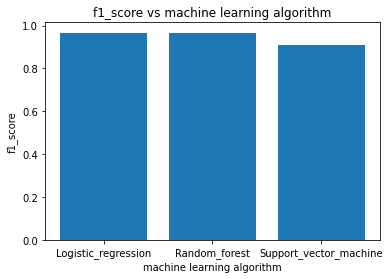

In [57]:
x=[f1_lr,f1_rf,f1_svm];
y=['Logistic_regression','Random_forest','Support_vector_machine']
plt.xlabel('machine learning algorithm')
plt.ylabel('f1_score')
plt.title('f1_score vs machine learning algorithm')
plt.bar(y,x)

Since the logistic regression have higher prediction accuracy, we will use it in our HARQ protocol. 

# 7. Model Saving

Since the logistic regression model has the highest performance, therefore we will use it in our HARQ protocol. For this model to be deployed in HARQ protocol, on MATLAB, we have to save it in the pickle file. This file will be imported to MATLAB an the model will be called as a function that predicts the acknowledgent of the current transmission. The model is saved by the code below.

In [58]:
#saving  the logistic regression model to the pickle file
pickle.dump(lr, open('lr_model.pkl', 'wb'))